# Basic Test

In [8]:
from imports import *
from agents import *
from environment import *
from simulations import *
from utils import *
from stationarity_analysis import *

# Environment Testing

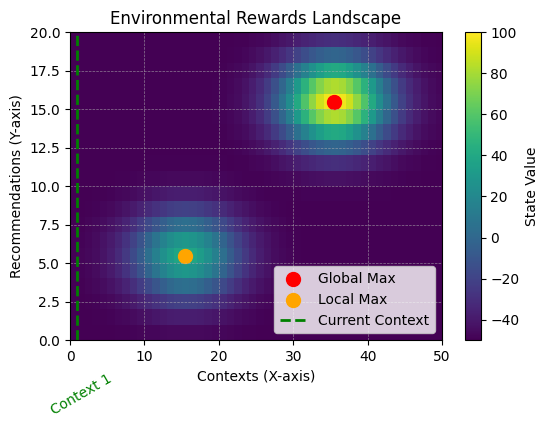

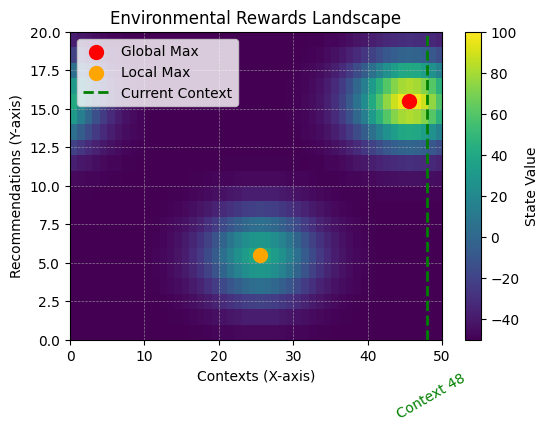

[1, np.int64(4), np.int64(49), np.int64(44), np.int64(47), np.int64(0), np.int64(3), np.int64(48), np.int64(45), np.int64(43), np.int64(48)]


In [9]:
ere = ExogenousRewardEnvironment()
ere.do_gaussian_smoothing()
ere.visualize_landscape(mark_context=True)
for steps in (range(10)):
  ere.step_context()
  ere.shift_environment_right()
ere.visualize_landscape(mark_context=True)
print(ere.get_context_history())

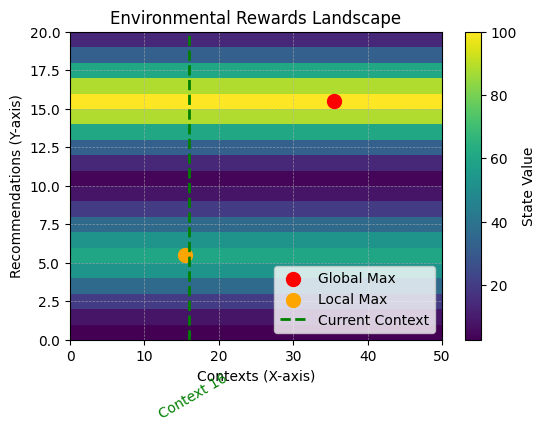

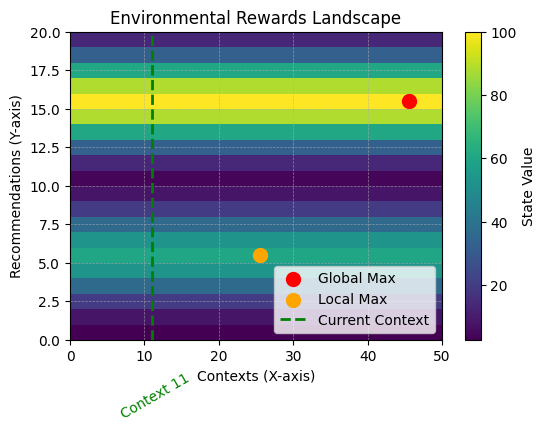

[16, np.int64(15), np.int64(12), np.int64(16), np.int64(11), np.int64(14), np.int64(16), np.int64(15), np.int64(20), np.int64(16), np.int64(11)]


In [10]:
ere = ExogenousRewardEnvironment()
ere.do_rows_gaussian_smoothing()
ere.visualize_landscape(mark_context=True)
for steps in (range(10)):
  ere.step_context()
  ere.shift_environment_right()
ere.visualize_landscape(mark_context=True)
print(ere.get_context_history())

# Simulation Testing

## Stationary, Initiation, No Modulation

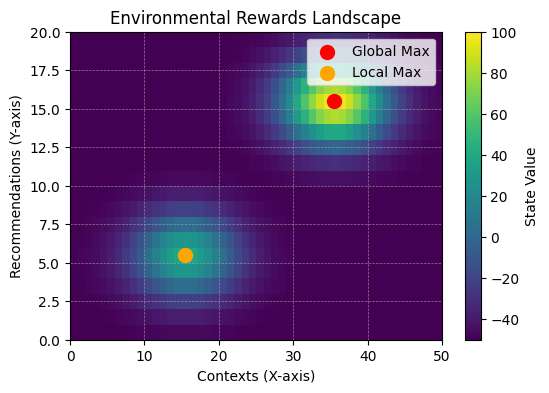

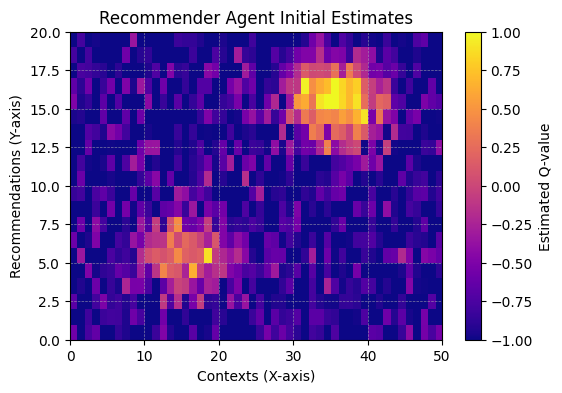

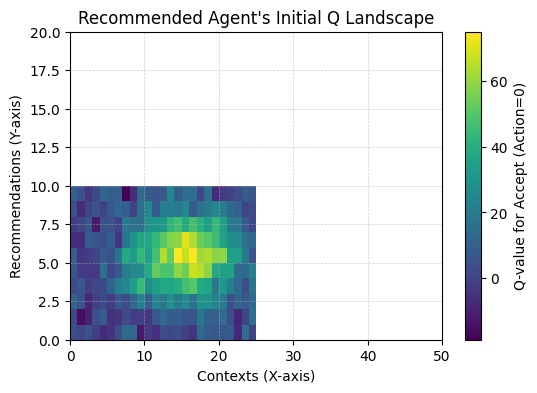

Running Simulation: 100%|██████████| 500000/500000 [00:43<00:00, 11611.85it/s]


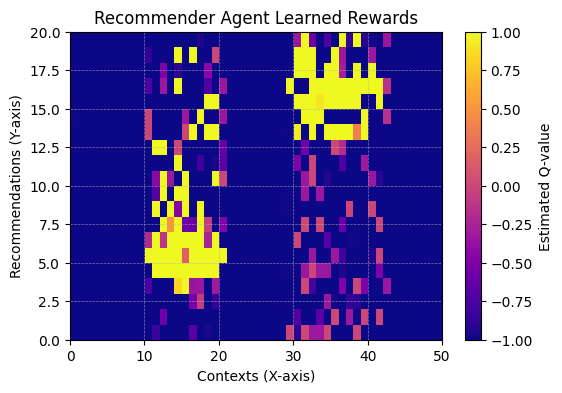

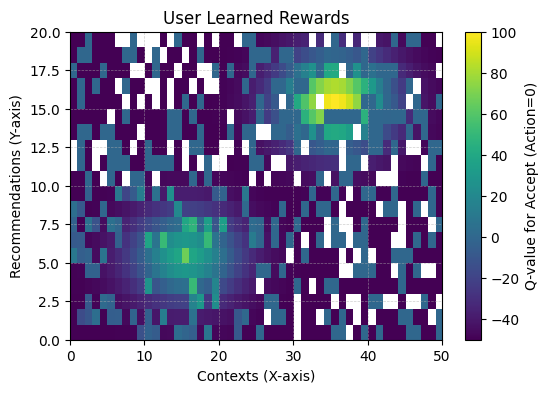

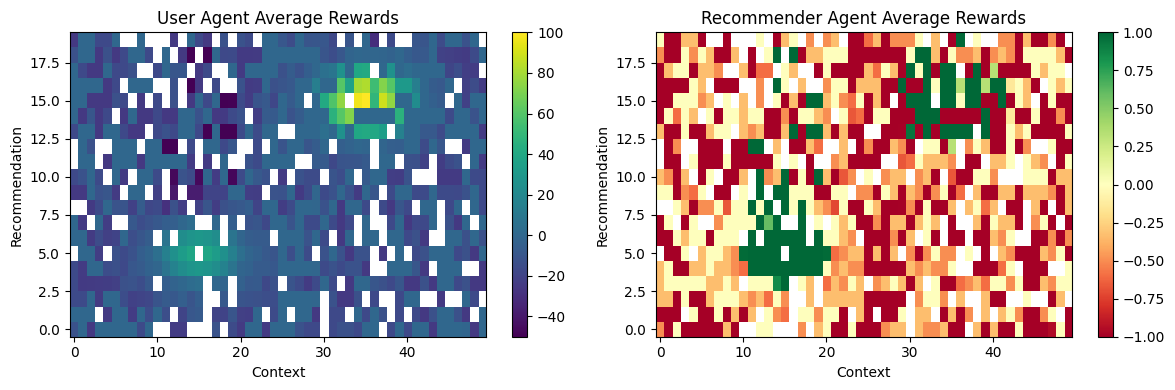

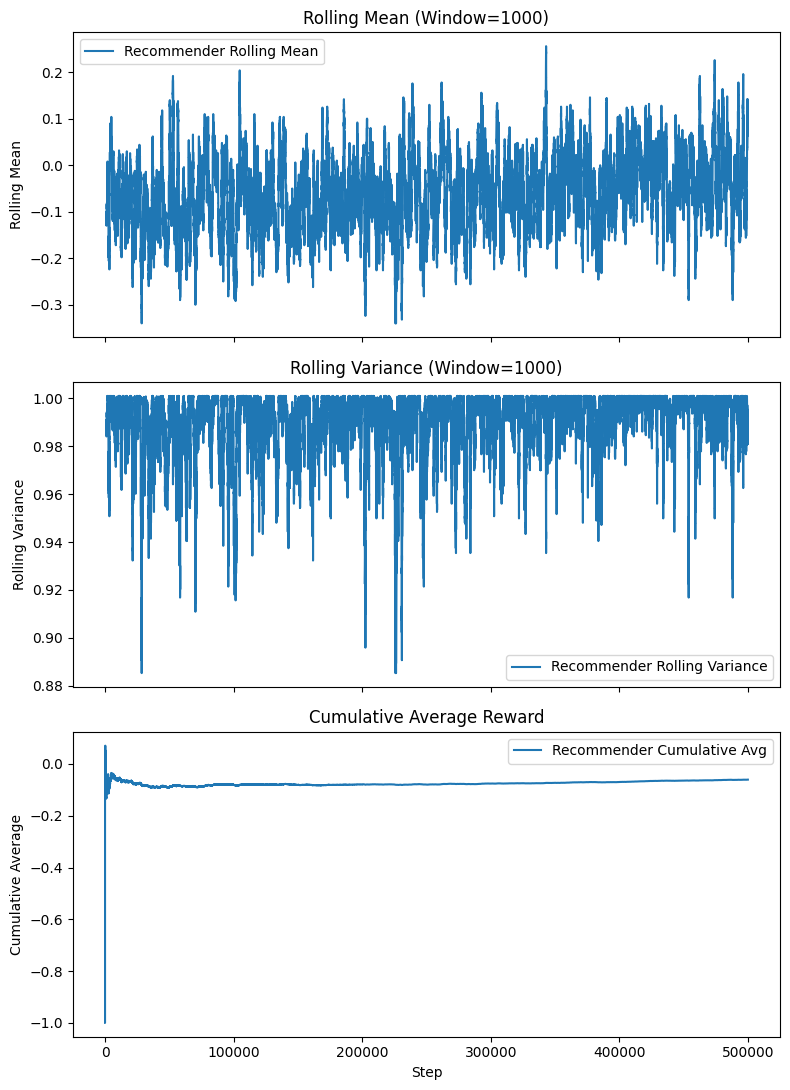

In [11]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 500000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, strategy='softmax', modulated = False)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
# stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# # Plot the p-values
# plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

# stationarity_df = test_stationarity_by_context(
#     contexts=results["context_history"],
#     rewards=results["recommender_rewards"])
# print(stationarity_df)

## Non-Stationary, Initiation, No Modulation



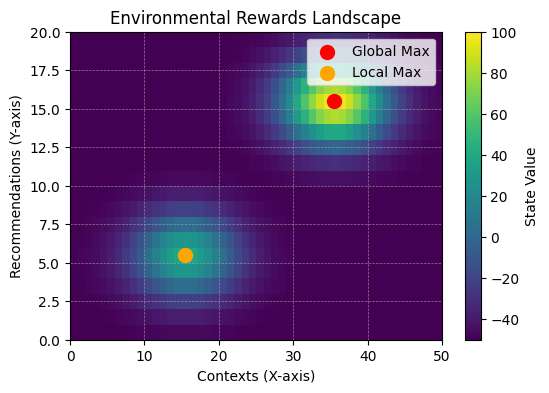

Running Simulation: 100%|██████████| 1000000/1000000 [01:47<00:00, 9261.65it/s]


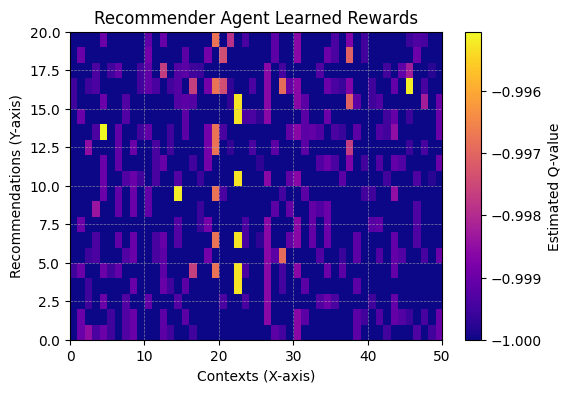

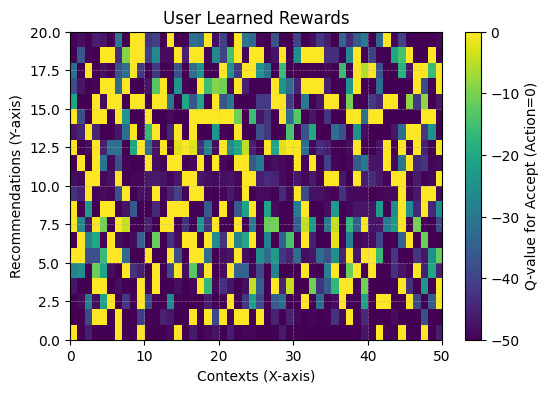

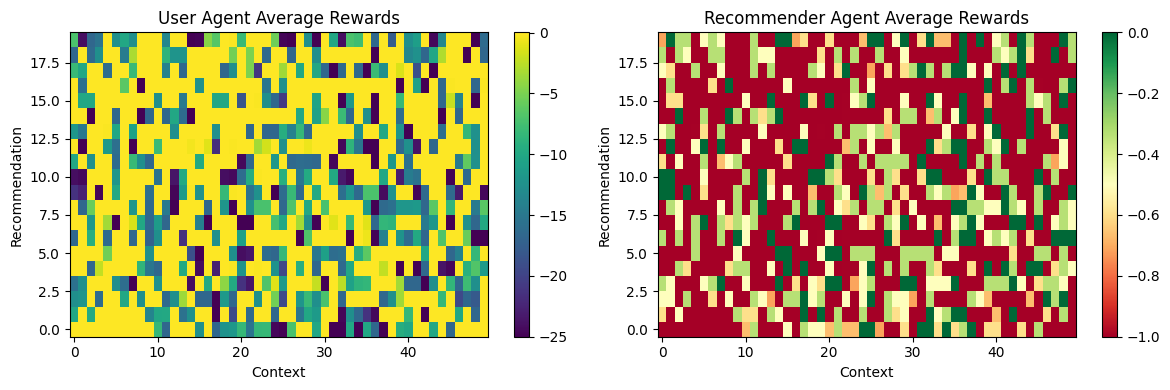

In [12]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = False,
                                    initialize_recommended= False,
                                    landscape_type='default',
                                    stationarity=False, strategy='softmax', modulated = False)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])

reward_series = results["recommender_rewards"]


## Stationary, Initiation, Moody Modulation

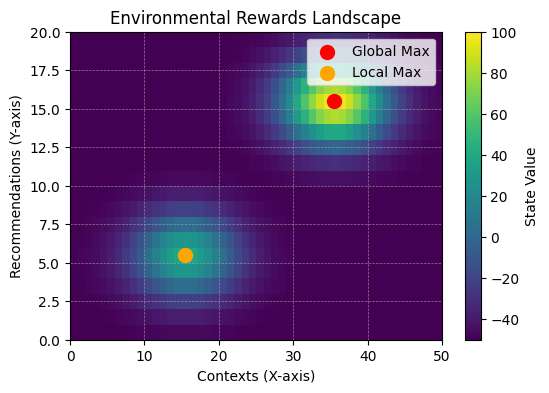

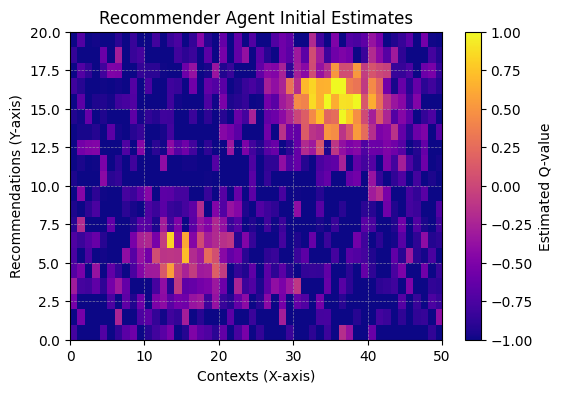

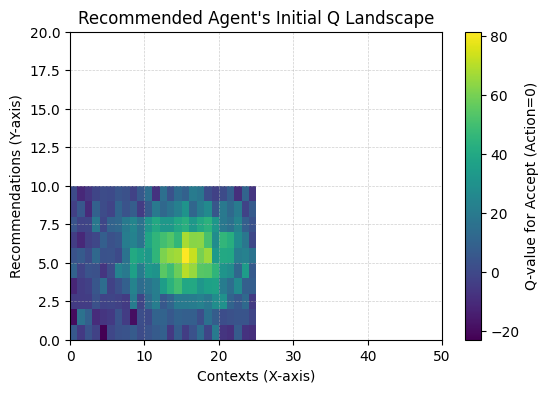

Running Simulation: 100%|██████████| 500000/500000 [00:56<00:00, 8914.79it/s]


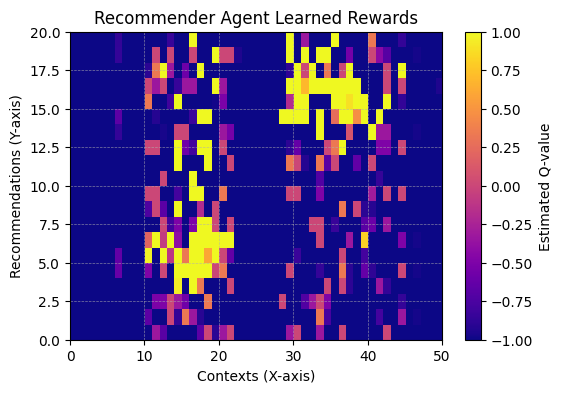

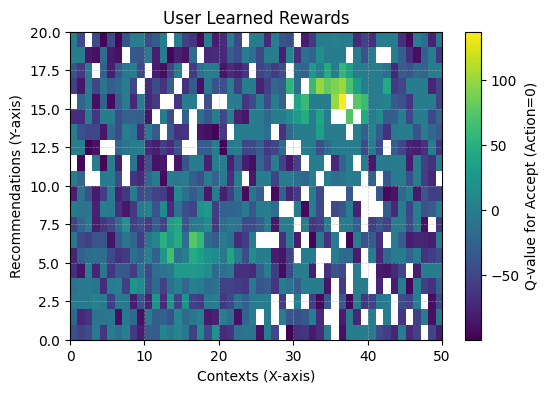

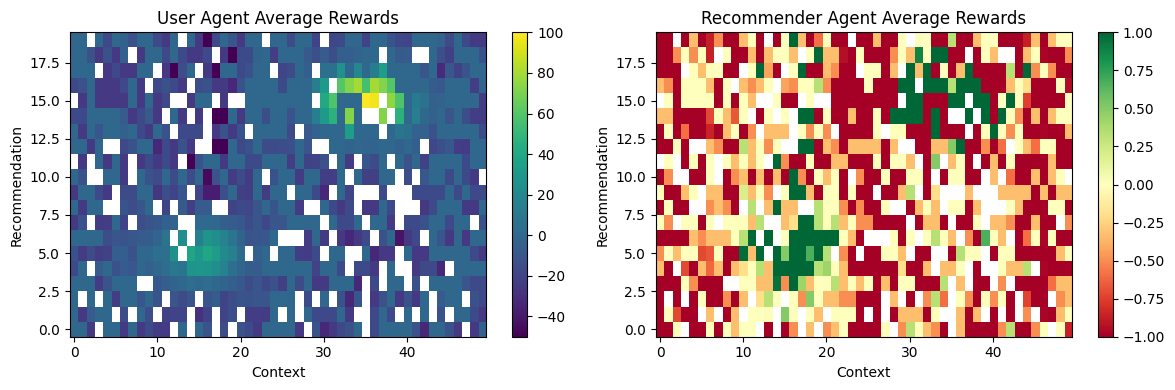

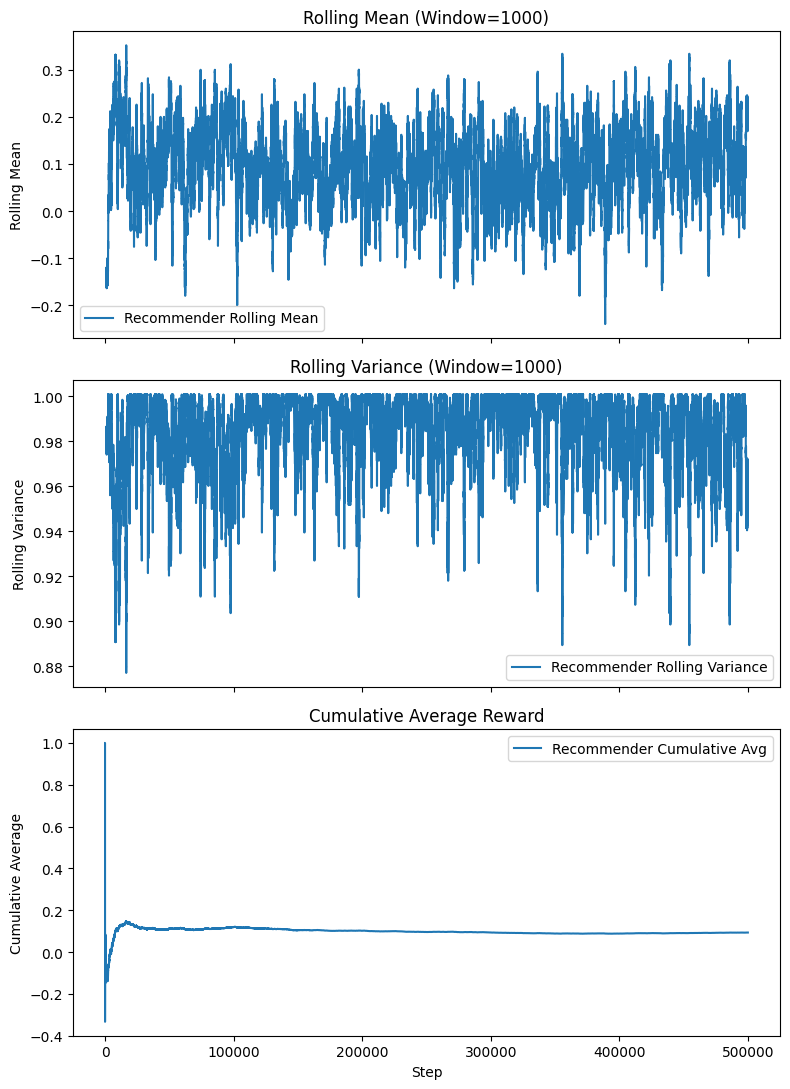

In [13]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 500000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, strategy='softmax', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]

## Stationary, Initiation, Receptor Modulation

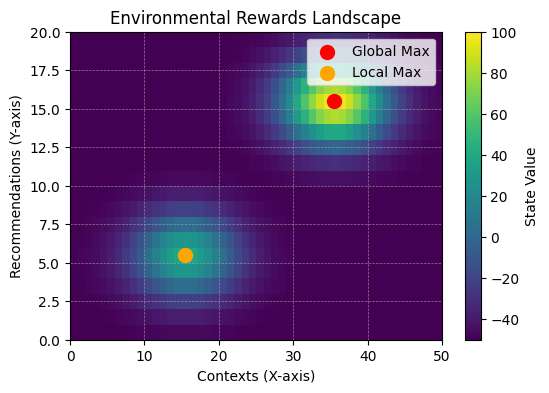

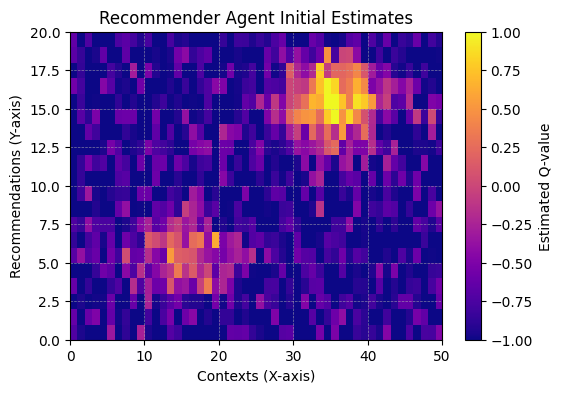

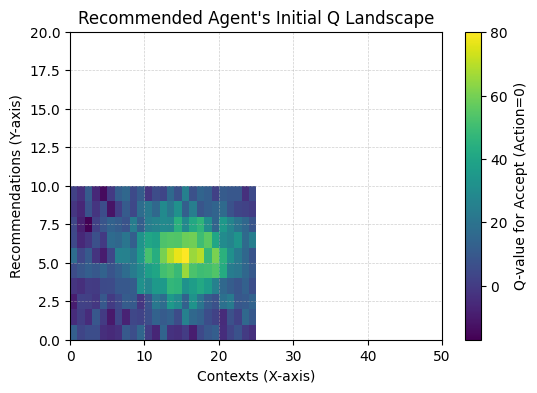

Running Simulation: 100%|██████████| 500000/500000 [00:46<00:00, 10644.92it/s]


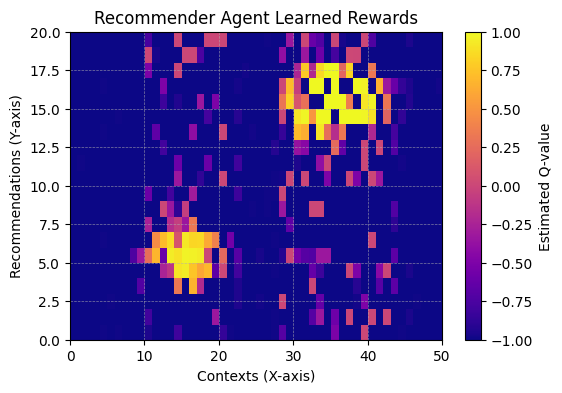

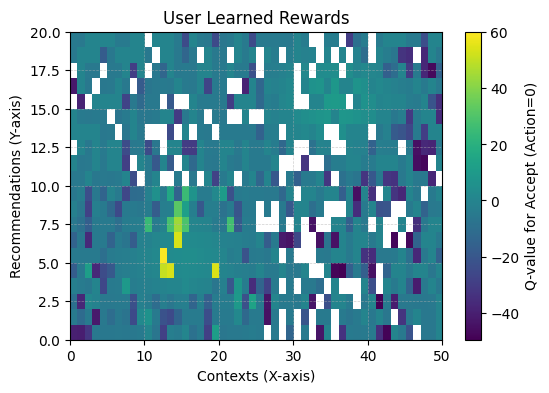

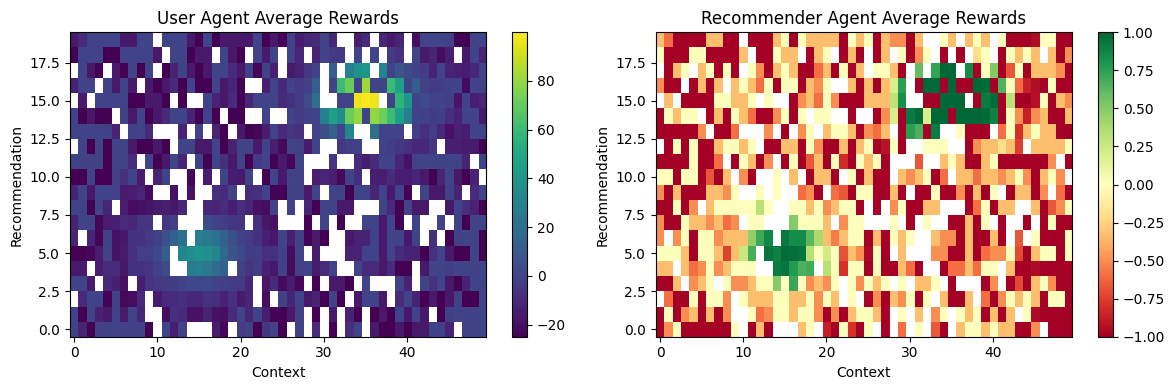

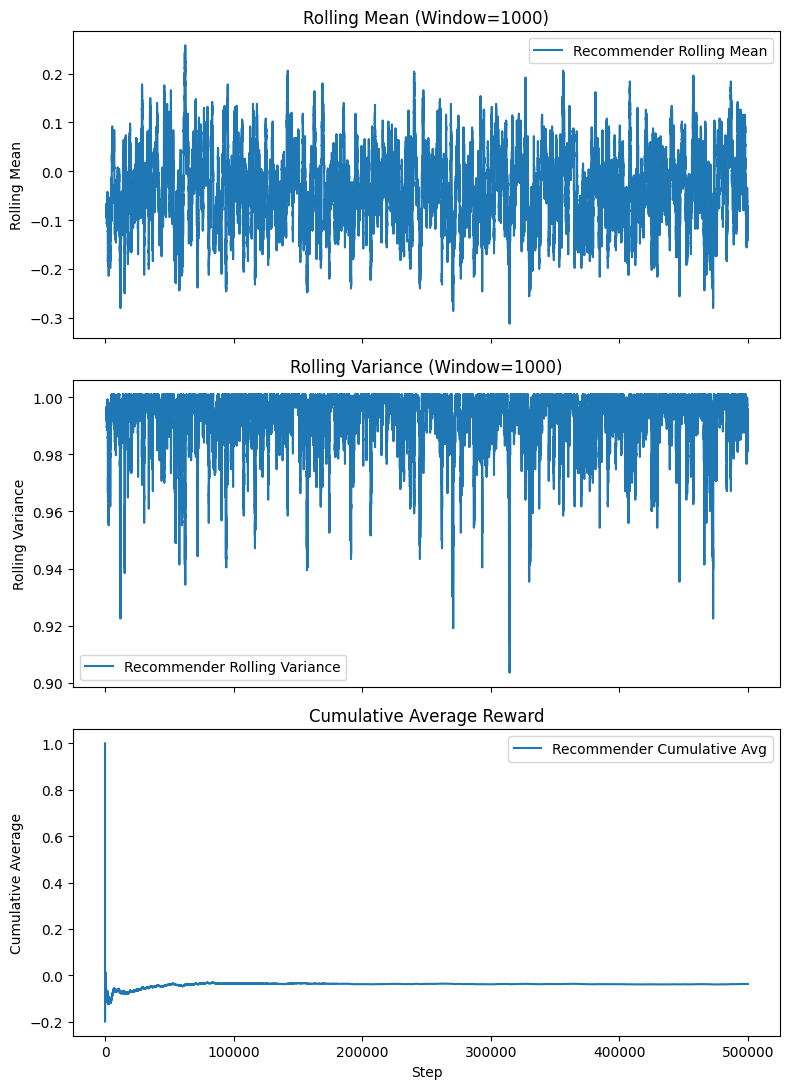

In [14]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=ReceptorModulator,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 500000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, strategy='softmax', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)


## Stationary, Initiation, Receptor Modulation

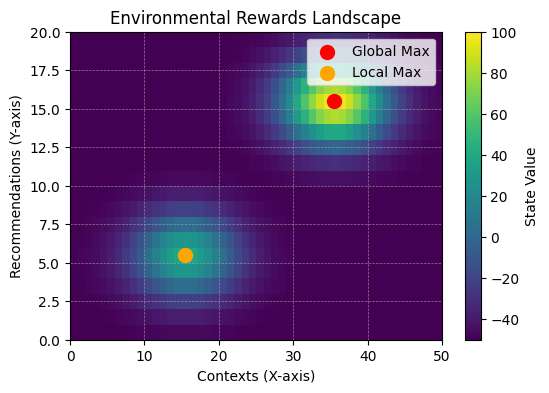

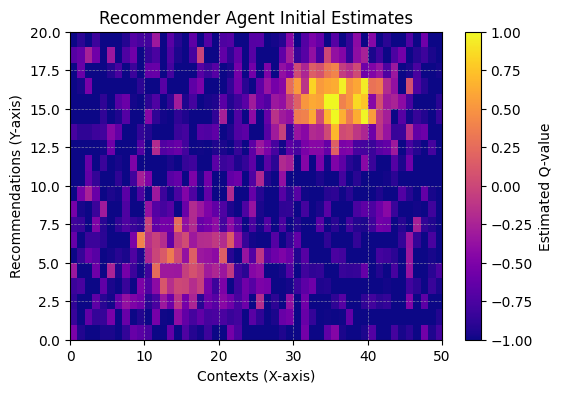

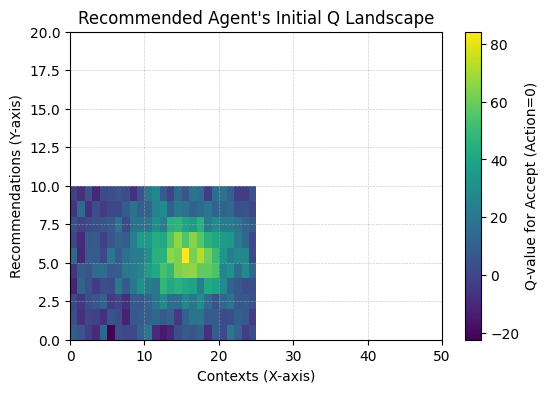

Running Simulation: 100%|██████████| 500000/500000 [00:45<00:00, 11064.32it/s]


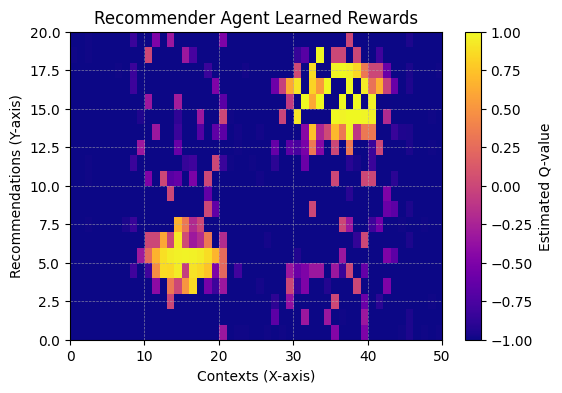

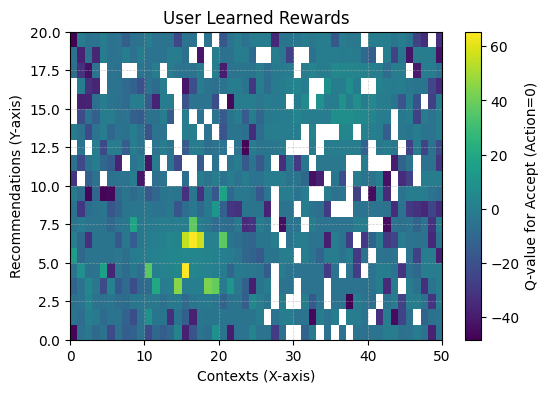

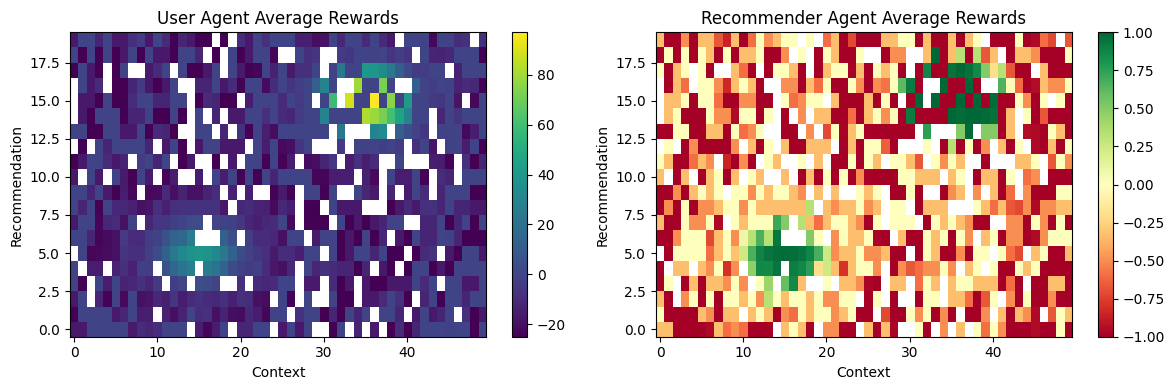

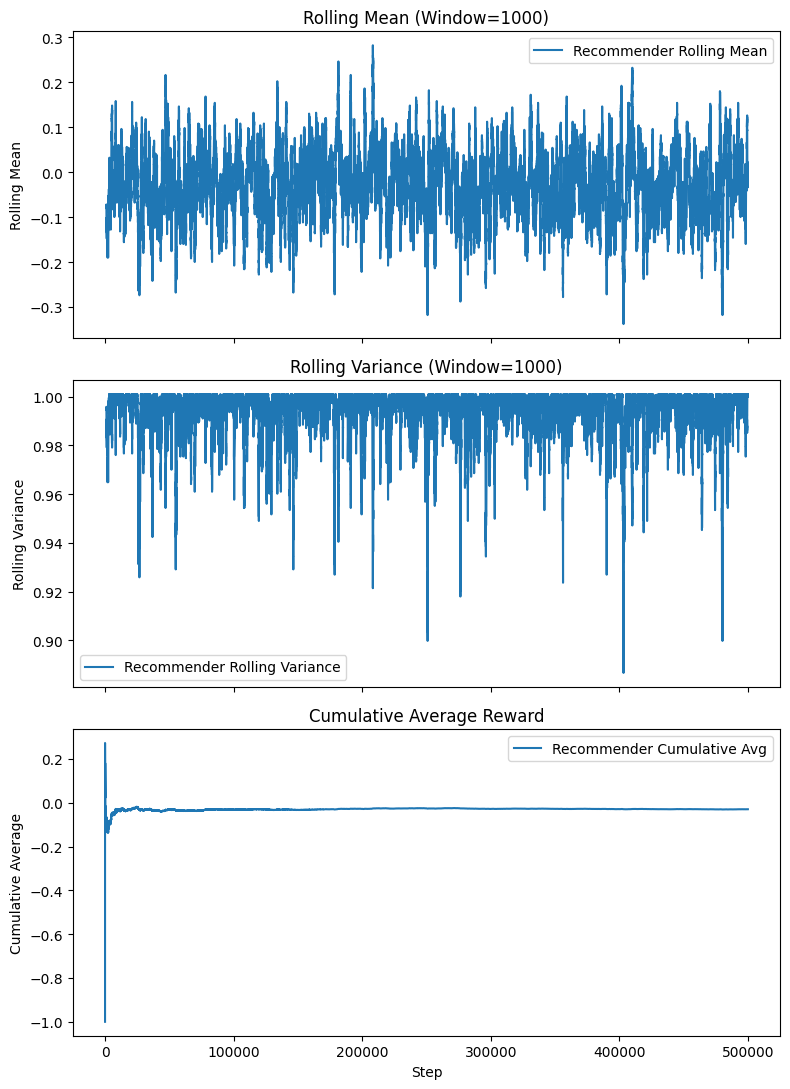

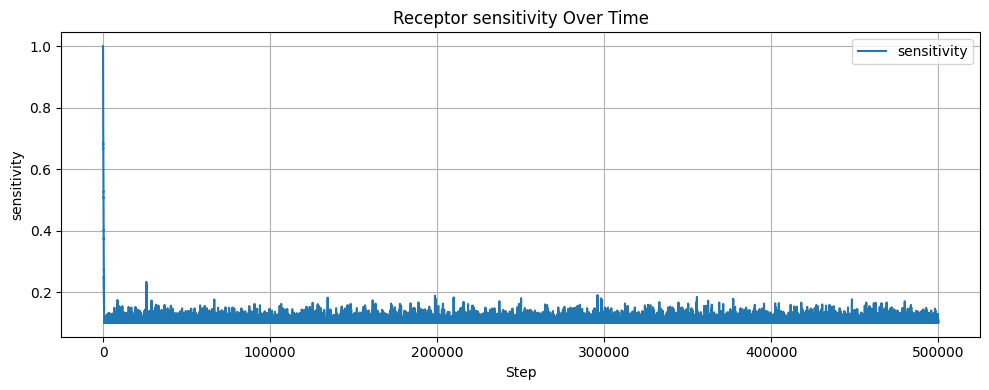

In [15]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=ReceptorModulator,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 500000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, strategy='softmax', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)
modulator = results["modulator"]
plot_sensitivity(modulator)

## Stationary, Initiation, Novelty Modulation

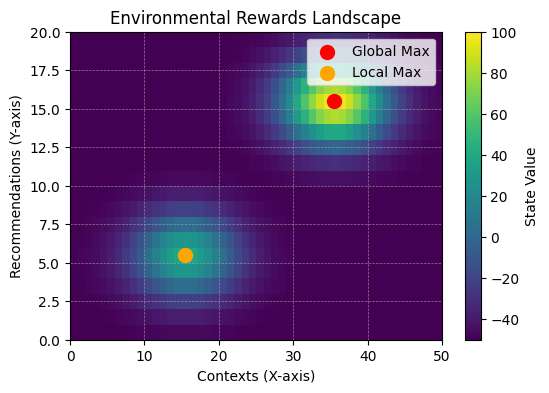

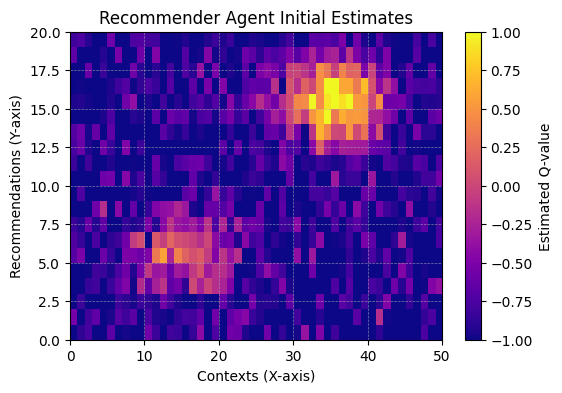

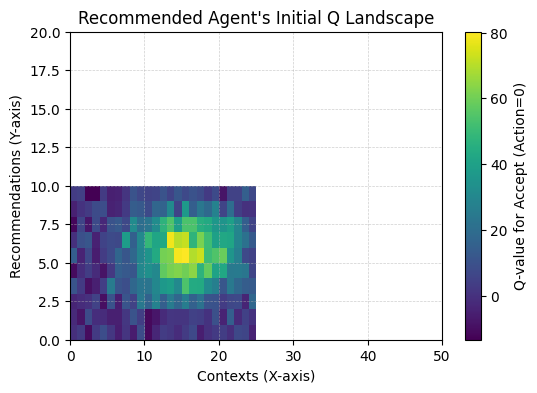

Running Simulation: 100%|██████████| 500000/500000 [00:42<00:00, 11744.16it/s]


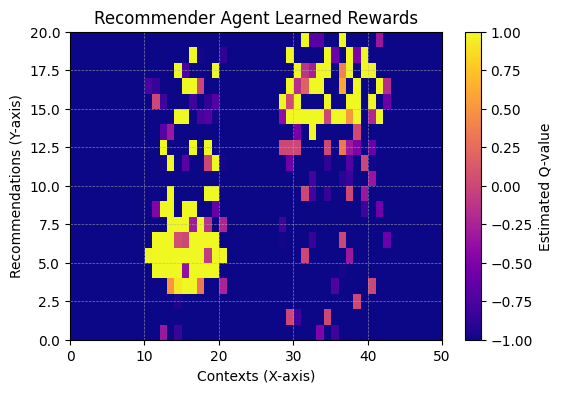

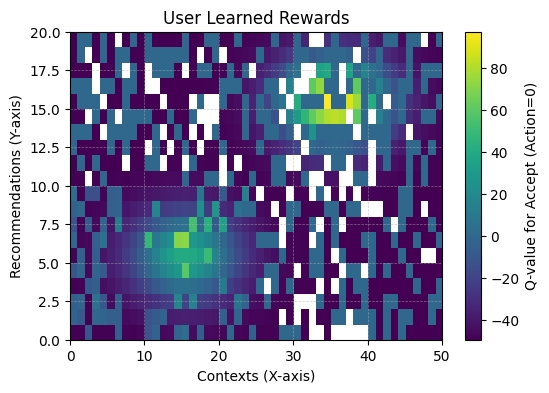

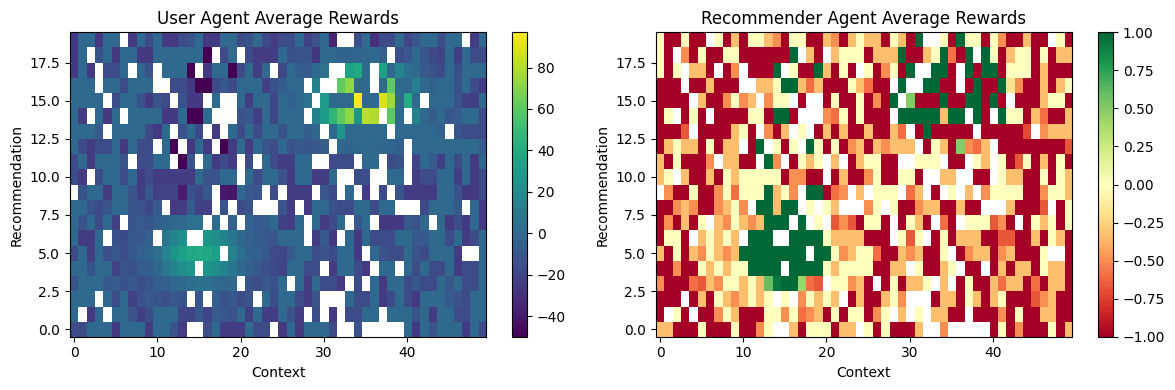

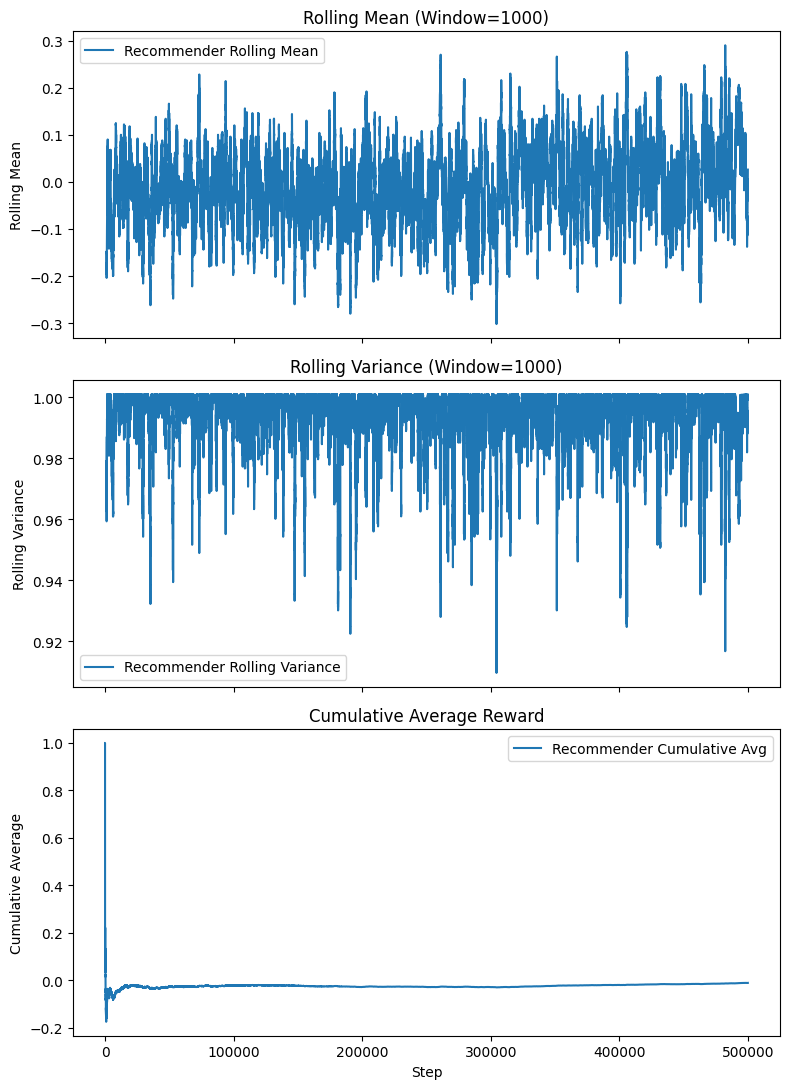

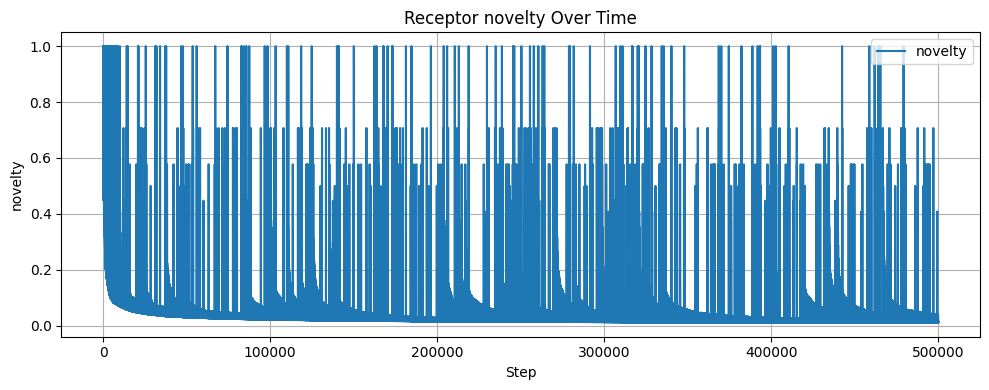

In [16]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=NoveltyModulator,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 500000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, strategy='softmax', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)
modulator = results["modulator"]
plot_sensitivity(modulator,variable='novelty')